In [ ]:
!pip install yfinance
!pip install plotly
!pip install prophet

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stocknews: filename=stocknews-0.9.11-py3-none-any.whl size=5397 sha256=5b8813b3b5733d2237391fbfbe5598e8af34fb4139cf2f5998a969709e113f91
  Stored in directory: /root/.cache/pip/wheels/9e/59/42/c5ab3171c3509ff8bc6aafbc089fe826eacf531ef7f7803ff6
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=a8060c2261e00e0cf8dcef9f0810c7ee8d8b6818fb5f1d749abadb91699c0f4f
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built stocknews sgmllib3k


In [ ]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = yf.download('GOOG', start='2017-01-01' , end='2023-07-30')

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df = df.reset_index()

In [ ]:
fig = px.line(df, x='Date', y='Close')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
df[['ds','y']] = df[['Date','Adj Close']]

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2017-01-03,38.940498,39.481499,38.790001,39.306999,39.306999,33146000,2017-01-03,39.306999
1,2017-01-04,39.417999,39.567001,39.158001,39.345001,39.345001,21460000,2017-01-04,39.345001
2,2017-01-05,39.304001,39.723999,39.250999,39.701000,39.701000,26704000,2017-01-05,39.701000
3,2017-01-06,39.763000,40.395000,39.610199,40.307499,40.307499,32804000,2017-01-06,40.307499
4,2017-01-09,40.320000,40.498299,40.141499,40.332500,40.332500,25492000,2017-01-09,40.332500
...,...,...,...,...,...,...,...,...,...
1648,2023-07-24,121.926003,123.349998,121.379997,121.879997,121.879997,22276100,2023-07-24,121.879997
1649,2023-07-25,121.879997,123.690002,121.529999,122.790001,122.790001,31820800,2023-07-25,122.790001
1650,2023-07-26,130.360001,131.369995,128.710007,129.660004,129.660004,46216900,2023-07-26,129.660004
1651,2023-07-27,131.800003,133.600006,129.179993,129.869995,129.869995,35931600,2023-07-27,129.869995


In [ ]:
train_data = df[df['ds'] < '2022-01-01']
test_data = df[df['ds'] >= '2022-01-01']
print(f'training data size : {train_data.shape}')
print(f'testing data size : {test_data.shape}')

training data size : (1259, 9)
testing data size : (394, 9)


In [ ]:
from sklearn.metrics import mean_absolute_error
# Initialize and fit the model
model = Prophet(daily_seasonality=True, changepoint_prior_scale=0.05)  # Adjust changepoint_prior_scale
model.fit(train_data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpi38hczep/aiftig89.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi38hczep/b14f2m6p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63138', 'data', 'file=/tmp/tmpi38hczep/aiftig89.json', 'init=/tmp/tmpi38hczep/b14f2m6p.json', 'output', 'file=/tmp/tmpi38hczep/prophet_modela1g5yt1x/prophet_model-20231210230221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:02:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:02:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Make predictions on the test data
prediction = model.predict(pd.DataFrame({'ds': test_data['ds']}))
y_actual = test_data['y']
y_predicted = prediction['yhat'].astype(int)
mae_test = mean_absolute_error(y_actual, y_predicted)
print(f'Mean Absolute Error: {mae_test}')

Mean Absolute Error: 91.69812559718407


<ipython-input-18-6dce7a0f38b9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



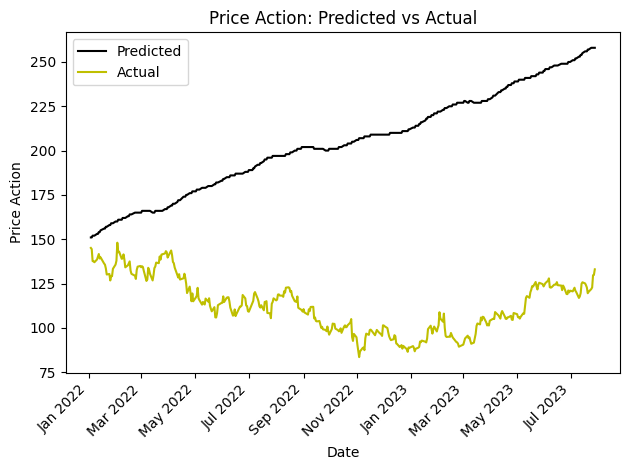

In [ ]:
test_data['ds'] = pd.to_datetime(test_data['ds'])

plt.plot(test_data['ds'], y_predicted, 'k', label='Predicted')
plt.plot(test_data['ds'], y_actual, 'y', label='Actual')

plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

plt.xticks(rotation=45, ha='right')

plt.xlabel("Date")
plt.ylabel("Price Action")
plt.title("Price Action: Predicted vs Actual")
plt.legend()  # Add legend for better clarity
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [ ]:
# Make predictions on the training data
prediction_train = model.predict(pd.DataFrame({'ds': train_data['ds']}))
y_actual_train = train_data['y']
y_predicted_train = prediction_train['yhat'].astype(int)
mae_train = mean_absolute_error(y_actual_train, y_predicted_train)
print(f'Train Mean Absolute Error: {mae_train}')

Train Mean Absolute Error: 2.0411352259095836


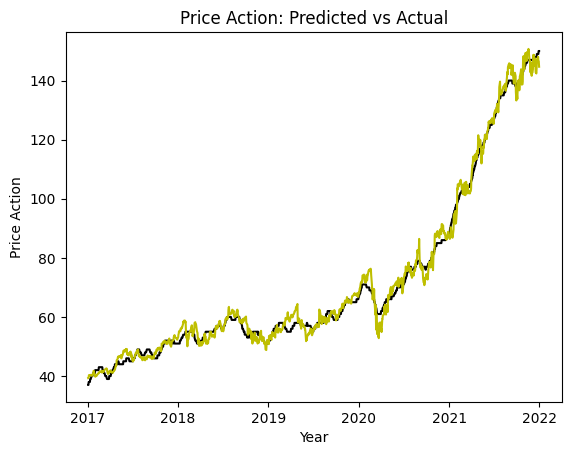

In [ ]:
plt.plot(train_data['ds'], y_predicted_train, 'k')
plt.plot(train_data['ds'], y_actual_train, 'y')
plt.xlabel("Year")
plt.ylabel("Price Action")
plt.title("Price Action: Predicted vs Actual")
plt.show()
#yellow line denotes actual price
#black line denotes predicted price

In [ ]:
model = Prophet()                                                               #creating an instant of prophet class in model.
model.fit(df)                                                           #fitting data_frame to the model.
future = model.make_future_dataframe(365)                                       #making future dataframe for 365 days and storing the date values in future.
forecast = model.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpai3dj_oy/tt7ppeac.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpai3dj_oy/fhjxykpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25153', 'data', 'file=/tmp/tmpai3dj_oy/tt7ppeac.json', 'init=/tmp/tmpai3dj_oy/fhjxykpi.json', 'output', 'file=/tmp/tmpai3dj_oy/prophet_modeljw5fkk68/prophet_model-20231210225915.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:59:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:59:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


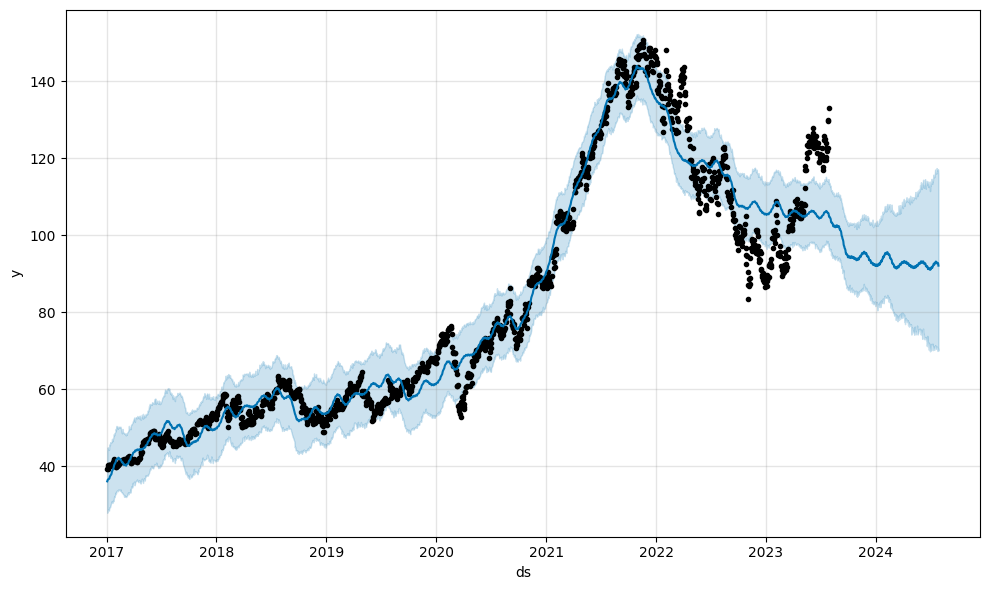

In [ ]:
model.plot(forecast)                                                            #plotting the values in forecast using atplotlib.
plt.show()                                                                      #displaying the graph.

In [ ]:
forecast[['ds',	'trend',	'yhat_lower',	'yhat_upper']].tail()

,ds,trend,yhat_lower,yhat_upper
2013,2024-07-23,88.053177,70.986573,117.176700
2014,2024-07-24,88.017181,69.932831,116.943908
2015,2024-07-25,87.981184,70.103144,117.163222
2016,2024-07-26,87.945187,70.615389,117.112034
2017,2024-07-27,87.909190,70.035144,115.902709
